In [1]:
import os,sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
A8_contacts = np.load('../../data/contacts/A8_contacts.npy',allow_pickle=True).item()
A13_contacts = np.load('../../data/contacts/A13_contacts.npy',allow_pickle=True).item()
A18_contacts = np.load('../../data/contacts/A18_contacts.npy',allow_pickle=True).item()

In [3]:
def make_df(contacts,name):
    mutations = {'A8':[272,300,303,305,307],
             'A13':[273,275,278,294,298,299],
             'A18':[272,274,277,285,294,300]}
    columns = list(contacts.keys())
    unique_res = np.unique(np.concatenate(list(contacts.values())))
    sorted_data = sorted(unique_res, key=lambda x: int(x[1:]))
    index = sorted_data
    array = np.zeros(shape=(len(index),len(columns)))
    for i,col in enumerate(columns):
        if i in [k-270 for k in mutations[name]]:
            c=1
        else:
            c=0
        for j,res in enumerate(index):
            if res in contacts[col]:
                array[j][i]+=1+c
    df = pd.DataFrame(array,columns=columns,index=index)
    return df.T

In [4]:
A8=make_df(A8_contacts,'A8')
A13=make_df(A13_contacts,'A13')
A18=make_df(A18_contacts,'A18')

# Plot Contacts by Miniprotein

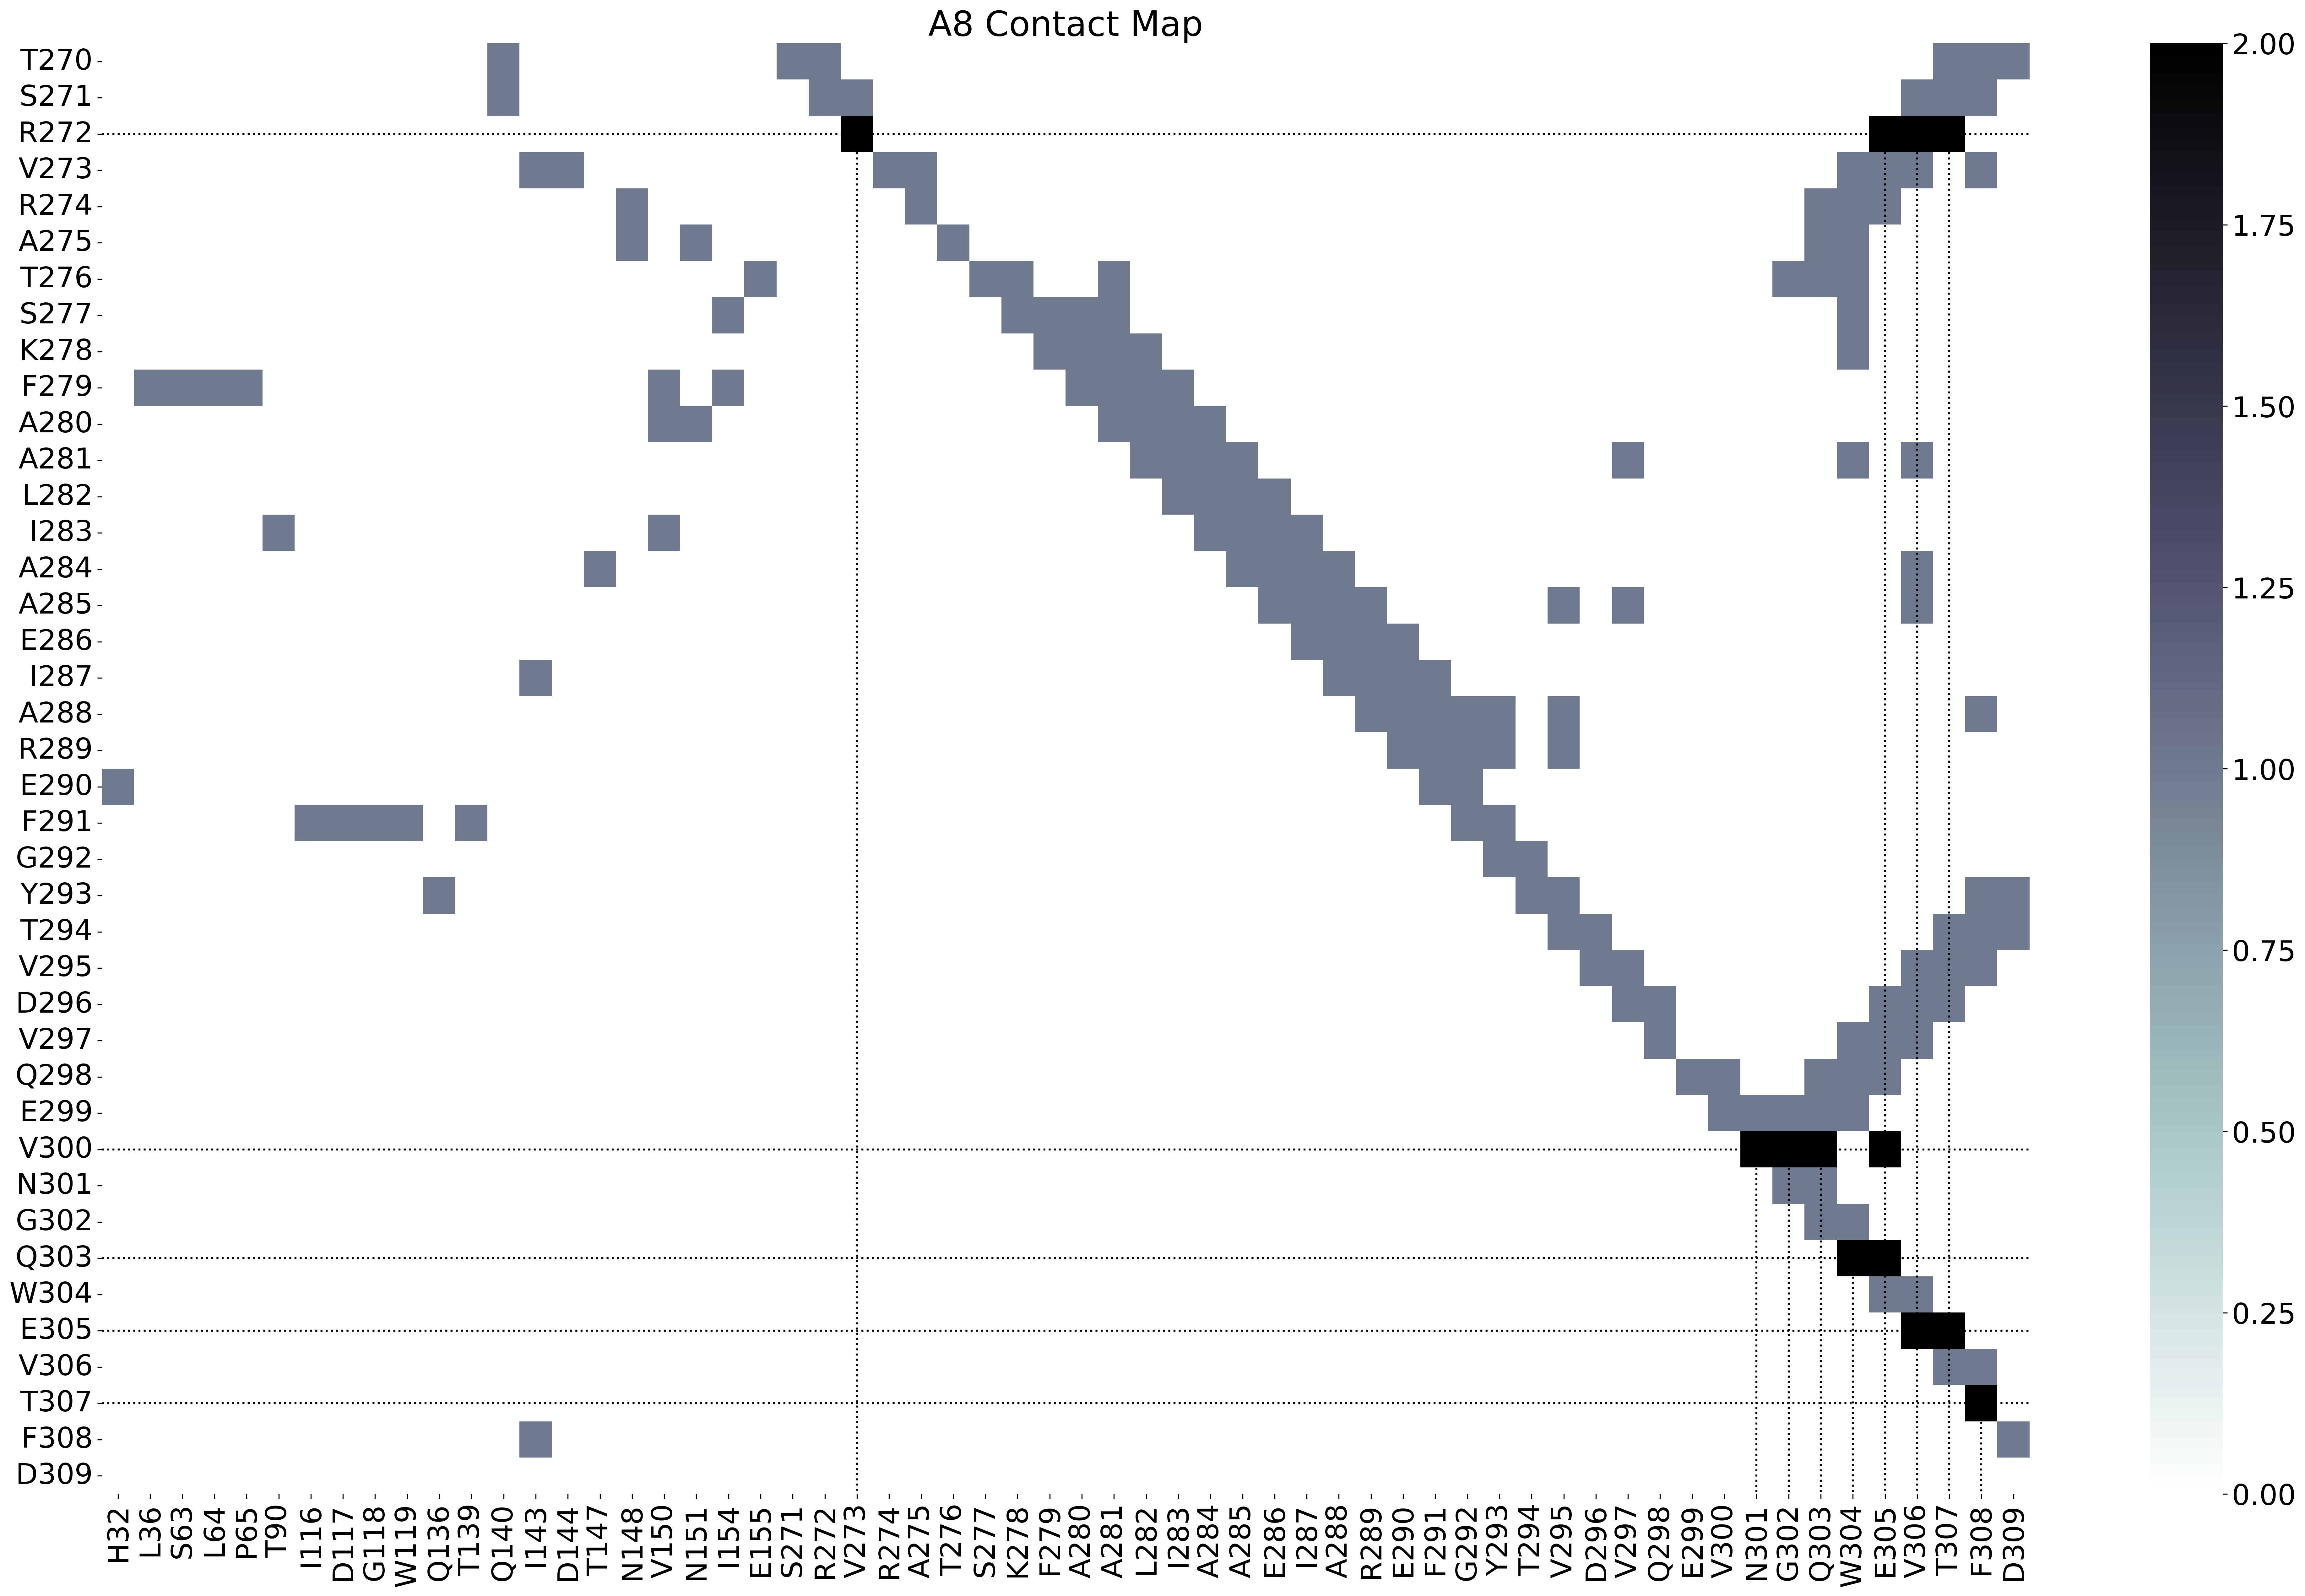

In [5]:
plt.rcParams.update({'font.size': 22})
mutations = {'A8':[272,300,303,305,307],
             'A13':[273,275,278,294,298,299],
             'A18':[272,274,277,285,294,300]}
df=A8
fig,ax = plt.subplots(figsize=(33,20),dpi=300)
sns.heatmap(df,vmin=0,vmax=2,ax=ax,cmap='bone_r')
for i in mutations['A8']:
    ax.hlines(i-269.5,0,len(df.columns),color='k',linestyle=':')
cols = df.columns
for col in df.columns:
    if 2 in list(df[col].values):
        height = np.argwhere(df[col].values==2)[0]
        index = np.argwhere(cols==col)
        ax.vlines(index+0.5,height,len(df.index),color='k',linestyle=':')
ax.set_title('A8 Contact Map')
fig.savefig(f'A8_contact_map.png',dpi=300)

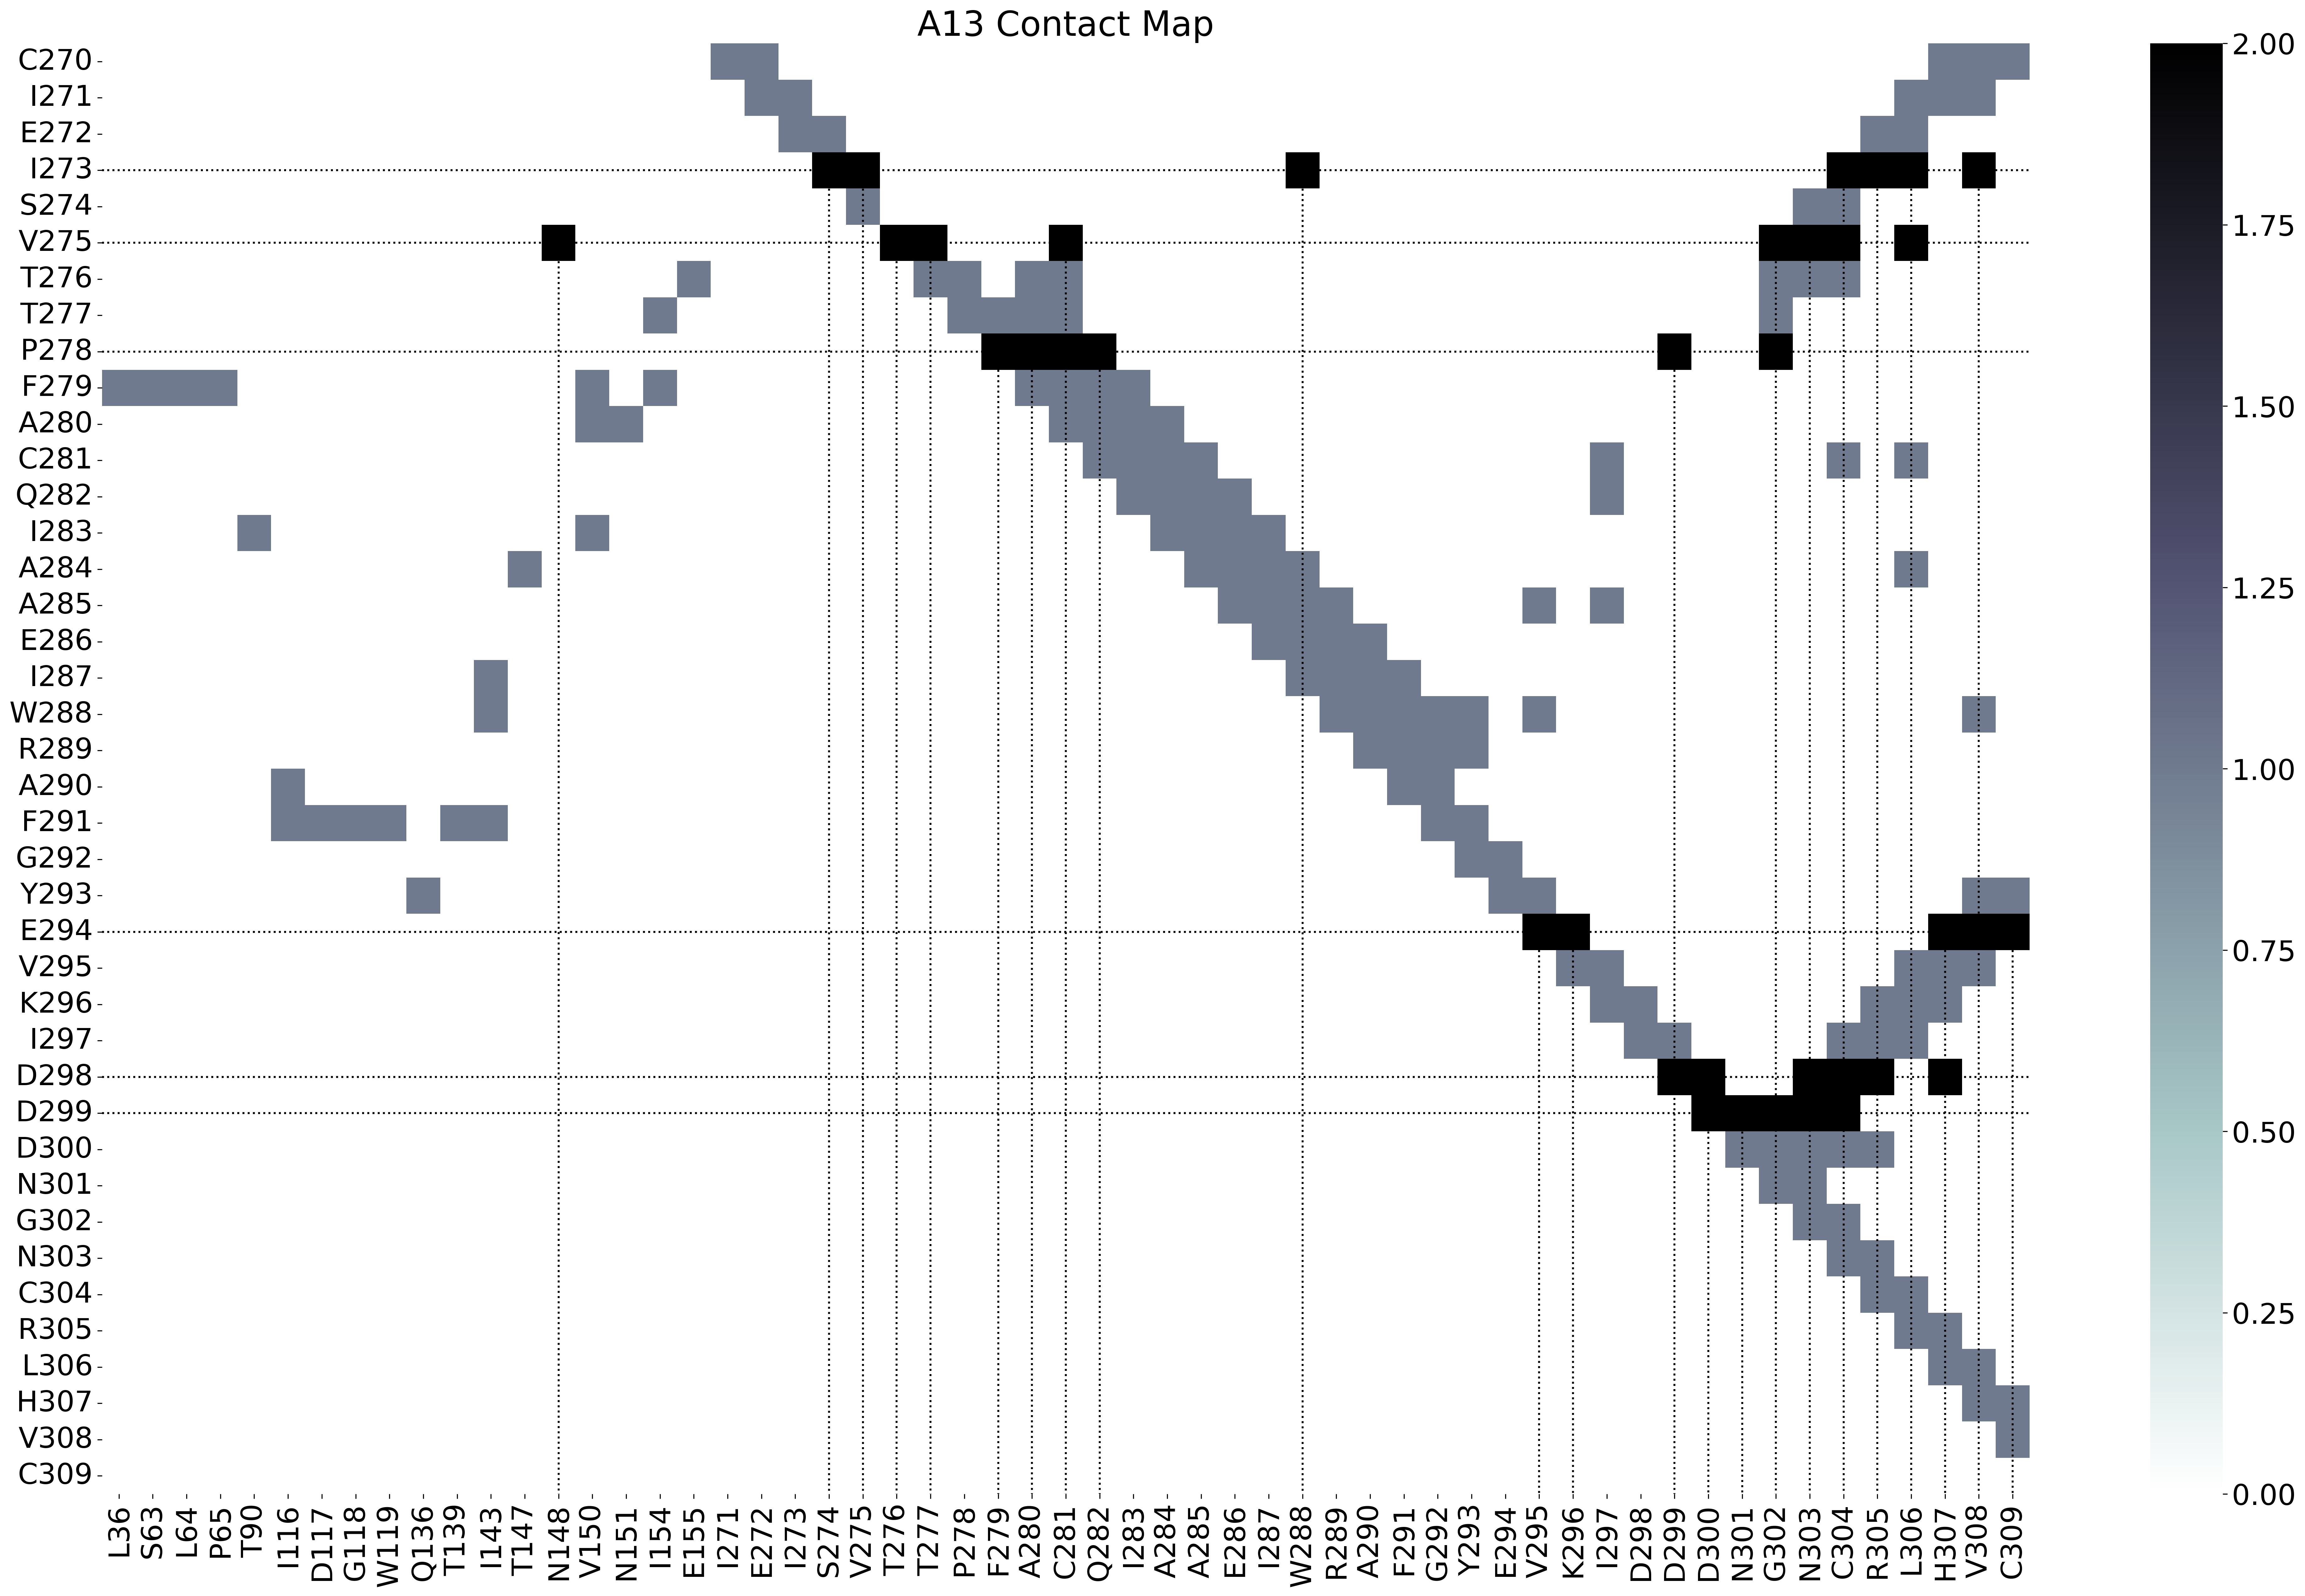

In [134]:
df=A13
fig,ax = plt.subplots(figsize=(33,20),dpi=300)
sns.heatmap(df,vmin=0,vmax=2,ax=ax,cmap='bone_r')
for i in mutations['A13']:
    ax.hlines(i-269.5,0,len(df.columns),color='k',linestyle=':')
cols = df.columns
for col in df.columns:
    if 2 in list(df[col].values):
        height = np.argwhere(df[col].values==2)[0]
        index = np.argwhere(cols==col)
        ax.vlines(index+0.5,height,len(df.index),color='k',linestyle=':')
ax.set_title('A13 Contact Map')
fig.savefig(f'A13_contact_map.png',dpi=300)

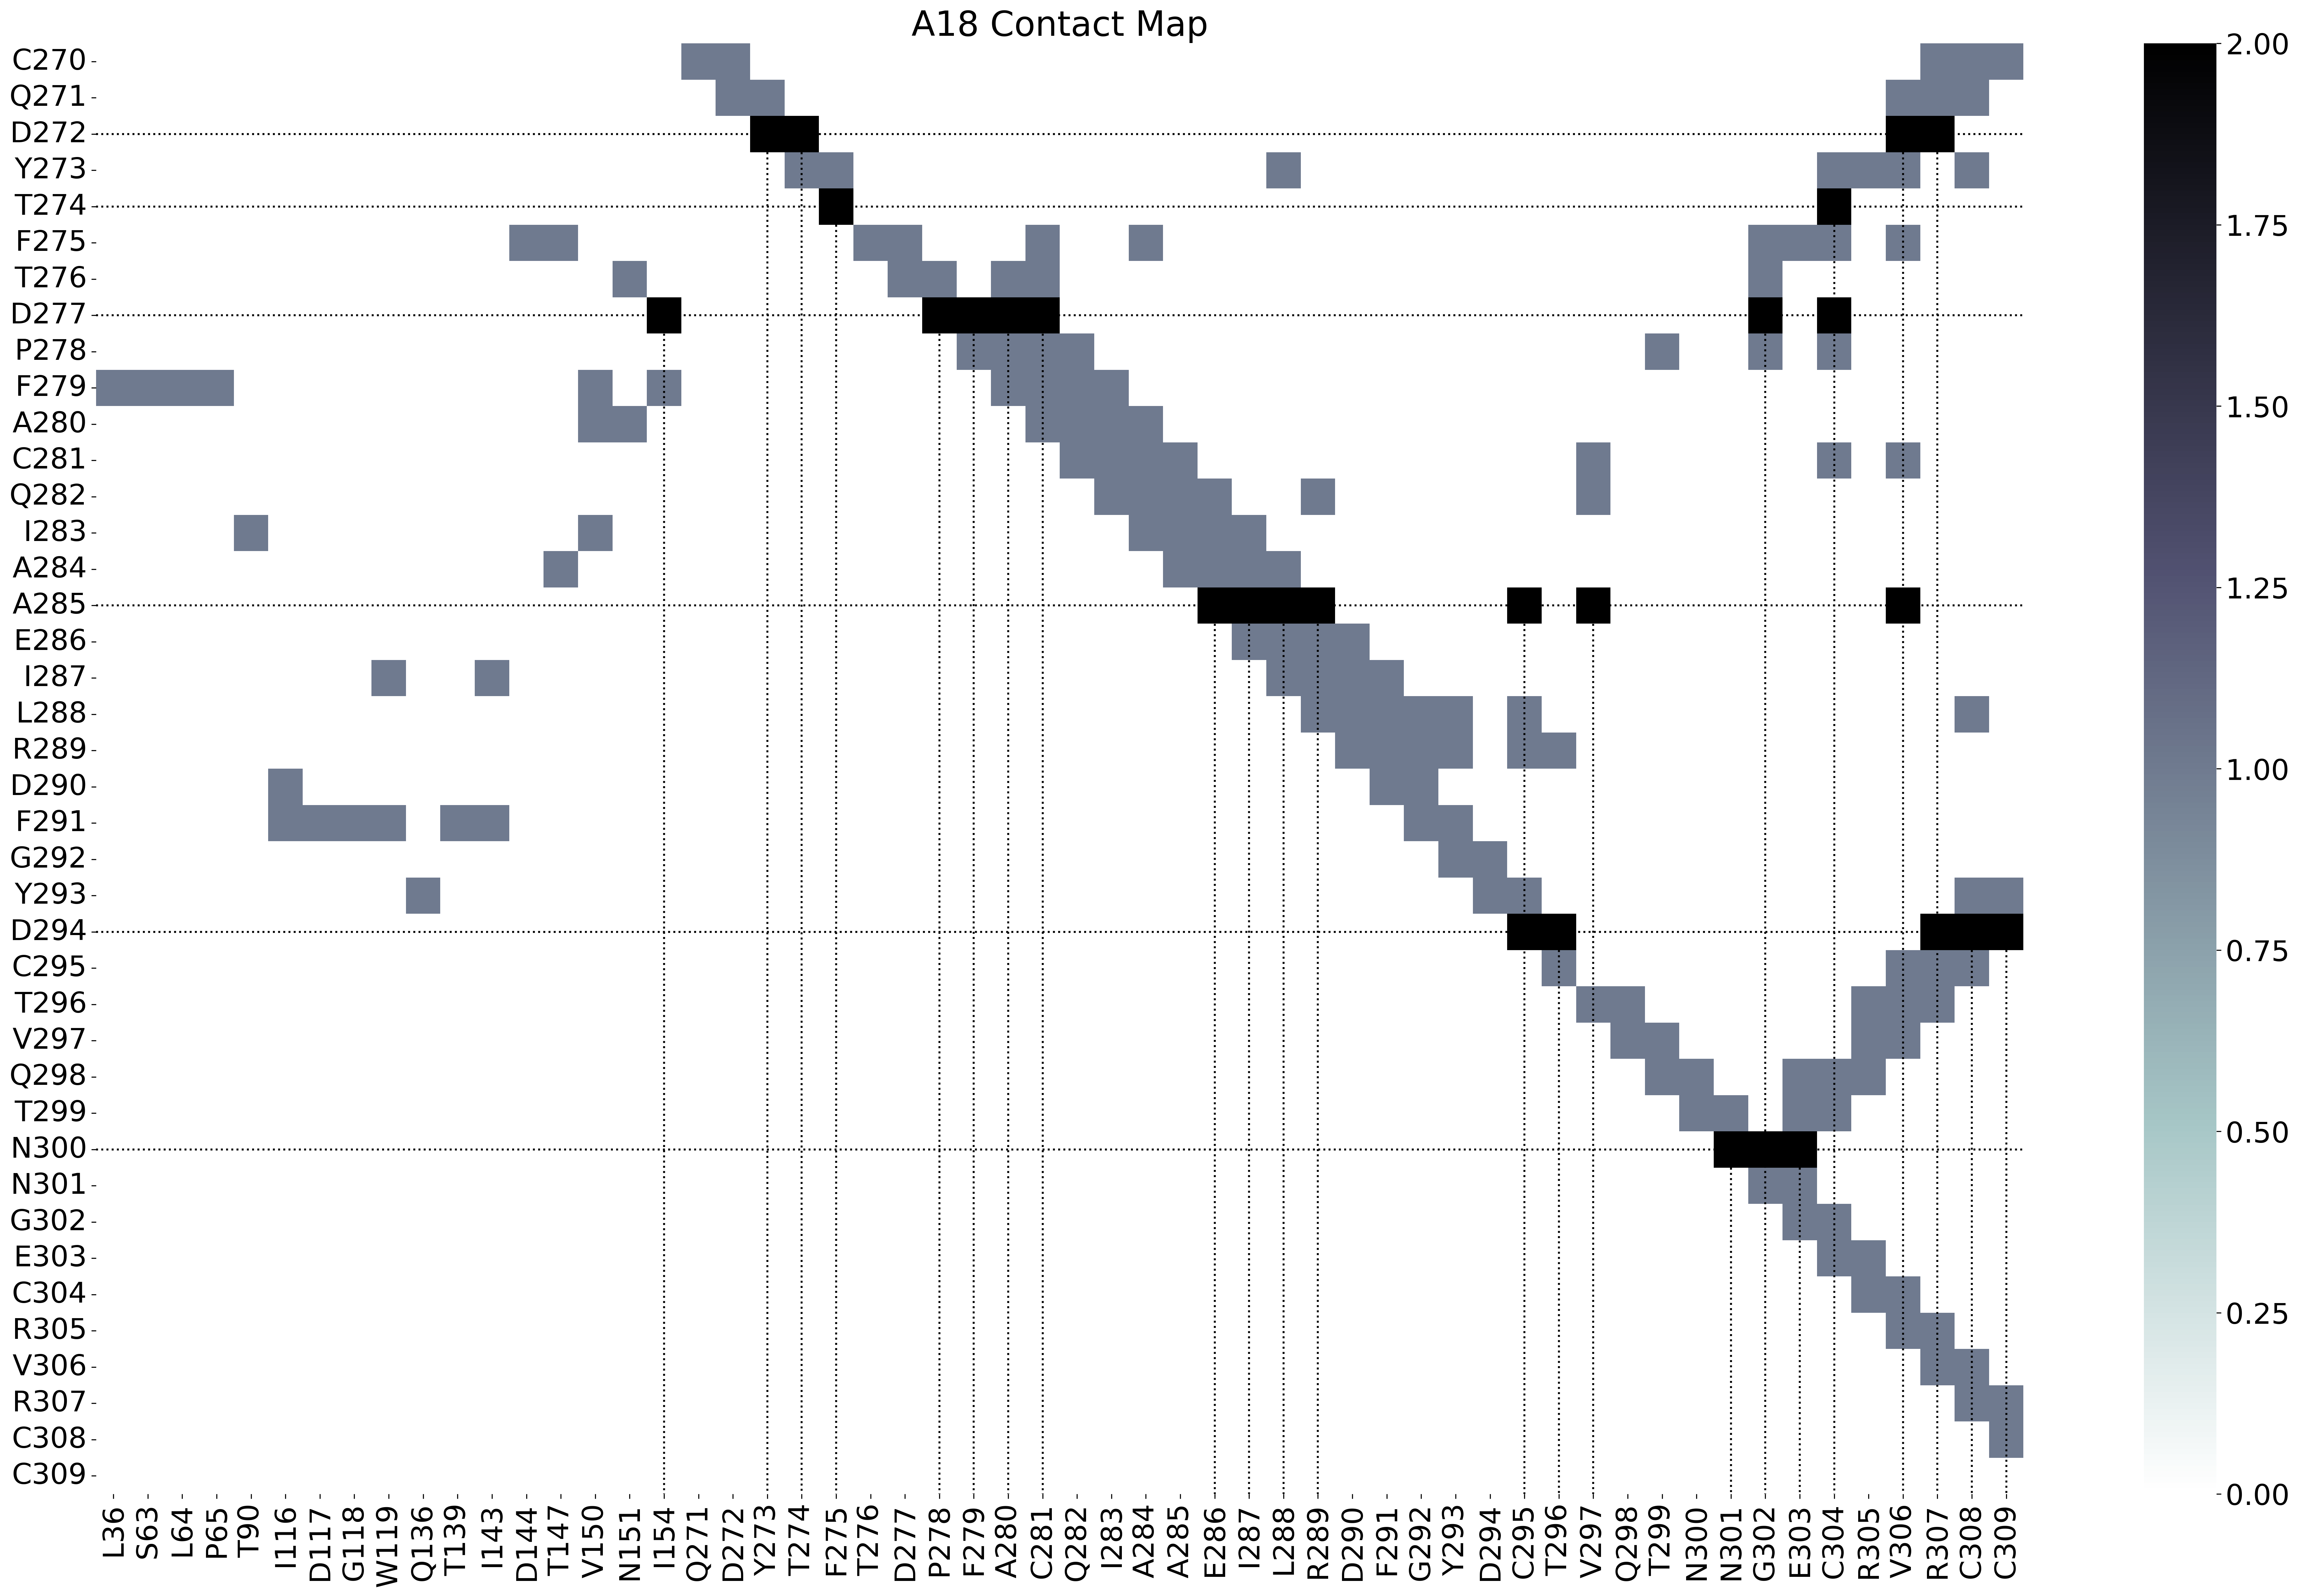

In [135]:
df=A18
fig,ax = plt.subplots(figsize=(33,20),dpi=300)
sns.heatmap(df,vmin=0,vmax=2,ax=ax,cmap='bone_r')
for i in mutations['A18']:
    ax.hlines(i-269.5,0,len(df.columns),color='k',linestyle=':')
cols = df.columns
for col in df.columns:
    if 2 in list(df[col].values):
        height = np.argwhere(df[col].values==2)[0]
        index = np.argwhere(cols==col)
        ax.vlines(index+0.5,height,len(df.index),color='k',linestyle=':')
ax.set_title('A18 Contact Map')
fig.savefig(f'A18_contact_map.png',dpi=300)